<a href="https://colab.research.google.com/github/sranifp/PBA-Sentimen-Analisis-UBER/blob/main/Regex_Analysis_UBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Perintah untuk mengaitkan Google Drive Anda
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path_di_drive = '/content/drive/MyDrive/Pengolahan Bahasa Alami/Bu IRMA/Tugas Individu/Data/uber_reviews_clean.csv'

In [4]:
# Load the dataset
df_clean = pd.read_csv(file_path_di_drive)
display(df_clean.head())

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_no_punct,content_no_emoji,content_tokens,content_final_clean
0,501420d1-a032-4981-bd64-fb948333bd2f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,doliczają dodatkowe opłaty ~10% po zakończonej...,1,0,4.601.10001,2025-10-28 09:51:39,NaN,NaN,4.601.10001,doliczają dodatkowe opłaty 10 po zakończonej u...,doliczają dodatkowe opłaty 10 po zakończonej u...,"['doliczają', 'dodatkowe', 'opłaty', '10', 'po...",doliczają dodatkowe opłaty 10 po zakończonej u...
1,5dc1a519-a151-4c46-88df-7aae80f24a3d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,excellent service,5,0,4.601.10001,2025-10-28 09:48:31,NaN,NaN,4.601.10001,excellent service,excellent service,"['excellent', 'service']",excellent
2,2fa137d8-0442-4b81-8ae4-3c2d1bf5120a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,5,0,4.601.10001,2025-10-28 09:46:39,NaN,NaN,4.601.10001,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,"['ابلكيشن', 'تحفة', 'و', 'كل', 'الكباتن', 'بتا...",ابلكيشن تحفة و كل الكباتن بتاعتة محترمين
3,ce296caf-168a-4876-8ea3-7907673d20ad,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,cool,5,0,NaN,2025-10-28 09:36:33,NaN,NaN,NaN,cool,cool,['cool'],cool
4,7ec3b59a-2129-4ee7-b7ae-a5ef7acdcbe0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"app says 1 min waiting, turned out waiting for...",1,0,4.601.10001,2025-10-28 09:30:28,NaN,NaN,4.601.10001,app says 1 min waiting turned out waiting for ...,app says 1 min waiting turned out waiting for ...,"['app', 'says', '1', 'min', 'waiting', 'turned...",say 1 waiting turned waiting 10 waiting fee ta...


# Analisa Regex untuk Insight Positif & Negatif

In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [18]:
# Kata kunci Positif (Penting)
positive_keywords = [
    'excellent', 'awesome', 'friendly', 'best', 'smooth', 'quick', 'easy',
    'love', 'perfect', 'accurate', 'helpful', 'five star', 'thank', 'thanks', 'helpfull', 'friendly', 'helpful', 'excellent', 'quick', 'friendly', 'helpful', 'excellent', 'quick', 'awesome', 'never', 'issue', 'cancel', 'problem', 'money', 'charge', 'payment', 'pay', 'bad', 'back', 'charged', 'worst', 'card', 'cancelled', 'waiting', 'didnt', 'late', 'doesnt', 'fee',
    'super', 'ok', 'safe', 'fast', 'amazing', 'useful', 'well', 'reliable', 'convenient', 'wonderful', 'cool', 'comfortable', 'superb', 'professional', 'happy', 'fantastic', 'clean', 'affordable', 'pleasant', 'gud', 'polite', 'fine', 'efficient', 'reasonable', 'wow', 'right', 'courteous', 'fair', 'kind', 'prompt', 'exceptional', 'simple', 'easier', 'outstanding', 'enjoyed', 'awsome', 'excelente', 'faster', 'timely', 'totally', 'enjoy', 'highly', 'brilliant', 'respectful', 'usefull', 'yes', 'beautiful', 'loving', 'proper', 'mast', 'definitely', 'fabulous', 'worth',
    'easily', 'safely', 'worked', 'possible', 'dependable', 'punctual', 'effective', 'satisfactory', 'decent', 'secure', 'rapido', 'appreciate', 'excelent', 'improved', 'fun', 'economical', 'helped', 'smart', 'convenience', 'fixed', 'muito', 'impressed', 'sweet', 'awsm', 'gd', 'performance', 'finally', 'saved', 'personable', 'value', 'helping', 'goood', 'clear', 'smart', 'required', 'fixed', 'honest', 'buena', 'pleased', 'humble', 'vgood', 'neat', 'interesting', 'trusted', 'efficient', 'reasonable', 'wow', 'right', 'courteous', 'fair', 'kind', 'prompt', 'exceptional', 'simple', 'easier', 'outstanding', 'enjoyable', 'enjoyed', 'awsome', 'excelente', 'faster', 'timely', 'totally', 'enjoy', 'highly', 'brilliant', 'respectful', 'usefull', 'yes', 'beautiful', 'loving', 'proper', 'mast', 'definitely', 'fabulous', 'worth', 'positive', 'easy', 'quick', 'loved', 'recommended', 'great', 'best', 'nice', 'smooth', 'accurate', 'amazing',
    'luv', 'mannered', 'responsible', 'jied', 'nicely', 'trustworthy', 'fastest', 'favorite', 'bless', 'valid', 'correctly', 'mejor', 'appreciated', 'incredible', 'glad', 'dope', 'satisfying', 'genuine', 'rock', 'relaxing', 'impressive', 'calm', 'thumb', 'excellant', 'peaceful', 'truly', 'reward', 'pleasent', 'easiest', 'swift', 'professionalism', 'functional', 'solid', 'courtesy', 'melhor', 'considerate', 'batter', 'lucky', 'transparent', 'instant', 'flawless', 'rápido', 'delightful', 'flawless', 'premium', 'amable', 'excited', 'premium', 'precise', 'lifesaver', 'loved', 'loving', 'vgood',
    'locked', 'broken', 'nonsense', 'wasting', 'banned', 'unfair', 'overpriced', 'dirty', 'hated', 'shouldnt', 'unnecessary', 'denied', 'idiot', 'mal', 'difficulty', 'fool', 'worthless', 'dangerous', 'worest', 'pricey', 'crap', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'inconvenient', 'pain', 'fail', 'unusable', 'easily', 'worked', 'possible', 'safely', 'dependable', 'punctual', 'satisfactory', 'decent', 'effective', 'excelent', 'improved', 'fun', 'economical', 'helped', 'smart', 'convenience', 'fixed', 'supper', 'impressed', 'sweet', 'awsm', 'gd', 'performance', 'finally', 'saved', 'personable', 'value', 'helping', 'goood', 'clear', 'smart', 'required', 'fixed', 'honest', 'buena', 'pleased', 'humble', 'vgood', 'neat', 'interesting', 'trusted', 'efficient', 'reasonable', 'wow', 'right', 'courteous', 'fair', 'kind', 'prompt', 'exceptional', 'simple', 'easier', 'outstanding', 'enjoyable', 'enjoyed', 'awsome', 'excelente', 'faster', 'timely', 'totally', 'enjoy', 'highly', 'brilliant', 'respectful', 'usefull', 'yes', 'beautiful', 'loving', 'proper', 'mast', 'definitely', 'fabulous', 'worth', 'positive', 'good job', 'perfectly', 'best', 'nice', 'smooth', 'accurate', 'amazing', 'supporting', 'jied', 'nicely', 'trustworthy', 'fastest', 'favorite', 'bless', 'valid', 'correctly', 'mejor', 'appreciated', 'incredible', 'glad', 'dope', 'satisfying', 'genuine', 'rock', 'relaxing', 'impressive', 'calm', 'thumb', 'excellant', 'peaceful', 'truly', 'reward', 'pleasent', 'easiest', 'swift', 'professionalism', 'functional', 'solid', 'courtesy', 'melhor', 'considerate', 'batter', 'lucky', 'transparent', 'instant', 'flawless', 'rápido', 'delightful', 'flawless', 'premium', 'amable', 'excited', 'premium', 'precise', 'lifesaver', 'loved', 'loving', 'vgood', 'welcome', 'comparatively', 'reasonably', 'speedy', 'joy', 'inform', 'greater', 'informed', 'nicee', 'preferred', 'promptly', 'successful', 'secured', 'owsome', 'marvellous', 'duper', 'superior', 'comfortably', 'epic', 'barato', 'bravo', 'intelligent', 'win', 'hospitality', 'functioning', 'blessed', 'cleanliness', 'relaxed', 'cheer', 'engaging', 'genius', 'sincere', 'incentive', 'treated', 'respectable', 'exciting', 'curtious', 'ótimo', 'awasome', 'zabardast', 'successfully', 'honor', 'fresh', 'nicest', 'servic', 'intelligent', 'excellent', 'amazing', 'perfect', 'awesome', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend', 'recommended', 'amazingly', 'positive', 'satisfied', 'warm', 'warmly', 'better', 'improve', 'improved', 'impressed', 'excellent', 'amazing', 'great', 'best', 'cool', 'perfect', 'accurate', 'smooth', 'reliable', 'safe', 'fast', 'quick', 'easy', 'convenient', 'comfortable', 'clean', 'professional', 'happy', 'fantastic', 'cool', 'wonderful', 'superb', 'effective', 'decent', 'efficient', 'good', 'nice', 'best', 'great', 'terrific', 'helpful', 'friendly', 'love', 'liked', 'recommend'
]

# Kata kunci Negatif (Isu/Masalah)
negative_keywords = [
    'worst', 'bad', 'charge', 'cancel', 'issue', 'problem', 'never', 'dont', 'problem', 'issue',
    'cant', 'rude', 'late', 'fault', 'scam', 'wrong', 'lag', 'didnt', 'error', 'problem','bad', 'worst',
    'never', 'issue', 'cancel', 'problem', 'charge', 'bad', 'worst', 'charged', 'money', 'pay', 'payment', 'cancelled', 'late', 'didnt', 'back', 'wrong', 'cancellation', 'fee', 'last', 'waiting', 'doesnt',
    'doesnt', 'high', 'expensive', 'poor', 'wont', 'unable', 'long', 'suck', 'waste', 'useless', 'slow', 'pathetic', 'nothing', 'horrible', 'terrible', 'less', 'point', 'low', 'hate', 'taking', 'couldnt', 'difficult', 'stupid', 'lost', 'disappointed', 'disabled', 'worse', 'uninstall', 'annoying', 'ridiculous', 'costly', 'delete', 'disgusting', 'unprofessional', 'frustrating', 'uninstalled', 'wouldnt',
    'bakwas', 'crash', 'awful', 'trash', 'fake', 'impossible', 'trouble', 'garbage', 'unreliable', 'wrost', 'complain', 'bekar', 'stuck', 'refuse', 'sarvice', 'zero', 'stopped', 'cheating', 'uninstalling', 'irritating', 'hassle', 'wasnt', 'constantly', 'ghatiya', 'rubbish', 'faltu', 'crashing', 'chor', 'refused', 'hang', 'disappointing', 'failed', 'damn', 'joke', 'shame', 'missing', 'buggy', 'damn', 'cheater', 'heavy', 'avoid', 'stranded', 'unsafe', 'rip', 'complicated', 'blank', 'incorrect', 'freeze', 'spam', 'disable', 'sad', 'thief',
    'closing', 'lock', 'poorly', 'unhappy', 'kill', 'frod', 'refusing', 'slower', 'screwed', 'fire', 'losing', 'ridiculously', 'misleading', 'lame', 'boring', 'harassment', 'lousy', 'dissatisfied', 'bekaar', 'freaking', 'horrível', 'crappy', 'abuse', 'abusive', 'bakvas', 'disappointment', 'fraudulent', 'angry', 'lixo', 'utterly', 'struggle', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'worest', 'bloody', 'hacked', 'pricey', 'sudden', 'crap', 'irritating', 'hassle', 'wasnt', 'constantly', 'ghatiya', 'rubbish', 'faltu', 'crashing', 'chor', 'refused', 'hang', 'disappointing', 'failed', 'damn', 'joke', 'shame', 'missing', 'buggy', 'damn', 'cheater', 'heavy', 'avoid', 'stranded', 'unsafe', 'rip', 'complicated', 'blank', 'incorrect', 'freeze', 'spam', 'disable', 'sad', 'thief', 'locked', 'broken', 'nonsense', 'wasting', 'banned', 'unfair', 'overpriced', 'dirty', 'hated', 'shouldnt', 'unnecessary', 'denied', 'idiot', 'mal', 'difficulty', 'fool', 'worthless', 'dangerous', 'worest', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'ruined', 'annoyed', 'utter', 'cheating', 'dropped', 'gone', 'cheating', 'uninstalling', 'irritating', 'hassle', 'wasnt', 'constantly', 'ghatiya', 'rubbish', 'faltu', 'crashing', 'chor', 'refused', 'hang', 'disappointing', 'failed', 'damn', 'joke', 'shame', 'missing', 'buggy', 'damn', 'cheater', 'heavy', 'avoid', 'stranded', 'unsafe', 'rip', 'complicated', 'blank', 'incorrect', 'freeze', 'spam', 'disable', 'sad', 'thief', 'locked', 'broken', 'nonsense', 'wasting', 'banned', 'unfair', 'overpriced', 'dirty', 'hated', 'shouldnt', 'unnecessary', 'denied', 'idiot', 'mal', 'difficulty', 'fool', 'worthless', 'dangerous', 'worest', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed',
    'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical', 'complained', 'disappeared', 'randomly', 'disaster', 'abuse', 'abusive', 'crappy', 'inconsistent', 'confusion', 'lixo', 'utterly', 'killing', 'monopoly', 'pissed', 'pointless', 'failure', 'ripped', 'disaster', 'drain', 'spamming', 'frustrated', 'sick', 'reject', 'tired', 'inconvenient', 'mess', 'unusable', 'unacceptable', 'glitchy', 'racist', 'looting', 'false', 'upset', 'froud', 'irresponsible', 'screw', 'caro', 'lose', 'stole', 'stress', 'criminal', 'hopeless', 'apk', 'decline', 'weird', 'stolen', 'broke', 'consuming', 'gouging', 'unethical', 'delayed', 'kharab', 'wast', 'virus', 'nightmare', 'crashed', 'loss', 'outrageous', 'freezing', 'illegal', 'junk', 'arrogant', 'pandemic', 'barely', 'unbelievable', 'mad', 'steal', 'messed', 'dead', 'greedy', 'pain', 'fail', 'unusable', 'unresponsive', 'ruined', 'critical', 'annoyed', 'failing', 'robbery', 'endless', 'absurd', 'hanged', 'unethical'
]

# Tambahan Kata Kunci untuk Penandaan Lebih Detail:
issue_keywords = ['account', 'location', 'map', 'app crash', 'driver issue']
praise_keywords = ['convenient', 'reliable', 'safe', 'fast', 'recommend']

# Gabungkan menjadi pola Regex (re.IGNORECASE = tidak sensitif huruf besar/kecil)
positive_pattern = re.compile('|'.join(positive_keywords), re.IGNORECASE)
negative_pattern = re.compile('|'.join(negative_keywords), re.IGNORECASE)
issue_pattern = re.compile('|'.join(issue_keywords), re.IGNORECASE)
praise_pattern = re.compile('|'.join(praise_keywords), re.IGNORECASE)

def find_detailed_keywords(review):
    review = str(review)

    # Kolom 1: Kehadiran Kata Positif Utama
    has_positive = 1 if positive_pattern.search(review) else 0

    # Kolom 2: Kehadiran Kata Negatif Utama
    has_negative = 1 if negative_pattern.search(review) else 0

    # Kolom 3: Kehadiran Kata Kunci Isu Spesifik
    has_issue = 1 if issue_pattern.search(review) else 0

    # Kolom 4: Kehadiran Kata Kunci Pujian/Rekomendasi
    has_praise = 1 if praise_pattern.search(review) else 0

    return pd.Series([has_positive, has_negative, has_issue, has_praise])

# Terapkan fungsi pada kolom ulasan asli ('content')
df_clean[['flag_pos_core', 'flag_neg_core', 'flag_issue_spec', 'flag_praise_recom']] = \
    df_clean['content'].apply(find_detailed_keywords)

df_clean['regex_sentiment'] = np.select(
    [
        (df_clean['flag_pos_core'] == 1) & (df_clean['flag_neg_core'] == 0),
        (df_clean['flag_pos_core'] == 0) & (df_clean['flag_neg_core'] == 1),
        (df_clean['flag_pos_core'] == 1) & (df_clean['flag_neg_core'] == 1)
    ],
    ['Positif', 'Negatif', 'Campuran'],
    default='Netral/Tidak Terdefinisi'
)

print("✅ Penandaan 4 Kolom dan Klasifikasi Sentimen Selesai.")
print("Contoh Ulasan dengan Detail Penandaan:")
print(df_clean[['content', 'flag_pos_core', 'flag_neg_core', 'flag_issue_spec', 'flag_praise_recom', 'regex_sentiment']].sample(5))


✅ Penandaan 4 Kolom dan Klasifikasi Sentimen Selesai.
Contoh Ulasan dengan Detail Penandaan:
                                                   content  flag_pos_core  \
263458                               very fast and simple.              1   
101039   aaron was exceptional! arrived 10 minutes earl...              1   
890002                              doesn't let me sign in              0   
1077179                                         very handy              0   
1349491  i just added money to paytm wallet in uber app...              1   

         flag_neg_core  flag_issue_spec  flag_praise_recom  \
263458               0                0                  1   
101039               0                0                  0   
890002               0                0                  0   
1077179              0                0                  0   
1349491              1                1                  0   

                  regex_sentiment  
263458                    Positif  

**VISUALISASI GRAFIK BATANG**

/tmp/ipython-input-2779541204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


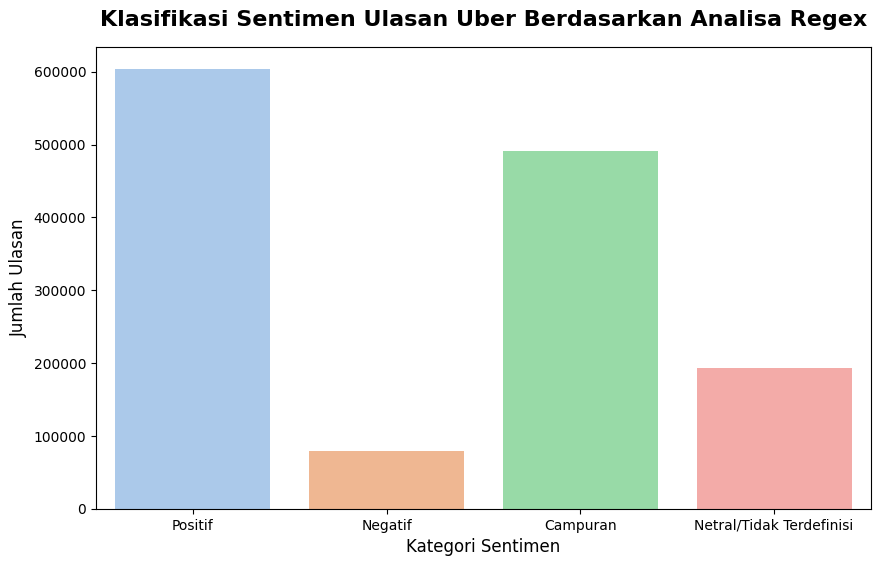

In [19]:
sentiment_counts = df_clean['regex_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=sentiment_counts,
    x='Sentiment',
    y='Count',
    palette='pastel',
    order=['Positif', 'Negatif', 'Campuran', 'Netral/Tidak Terdefinisi']
)

plt.title('Klasifikasi Sentimen Ulasan Uber Berdasarkan Analisa Regex', fontsize=16, weight='bold', pad=15)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.show()

**VISUALISASI WORD CLOUD PER SENTIMEN**

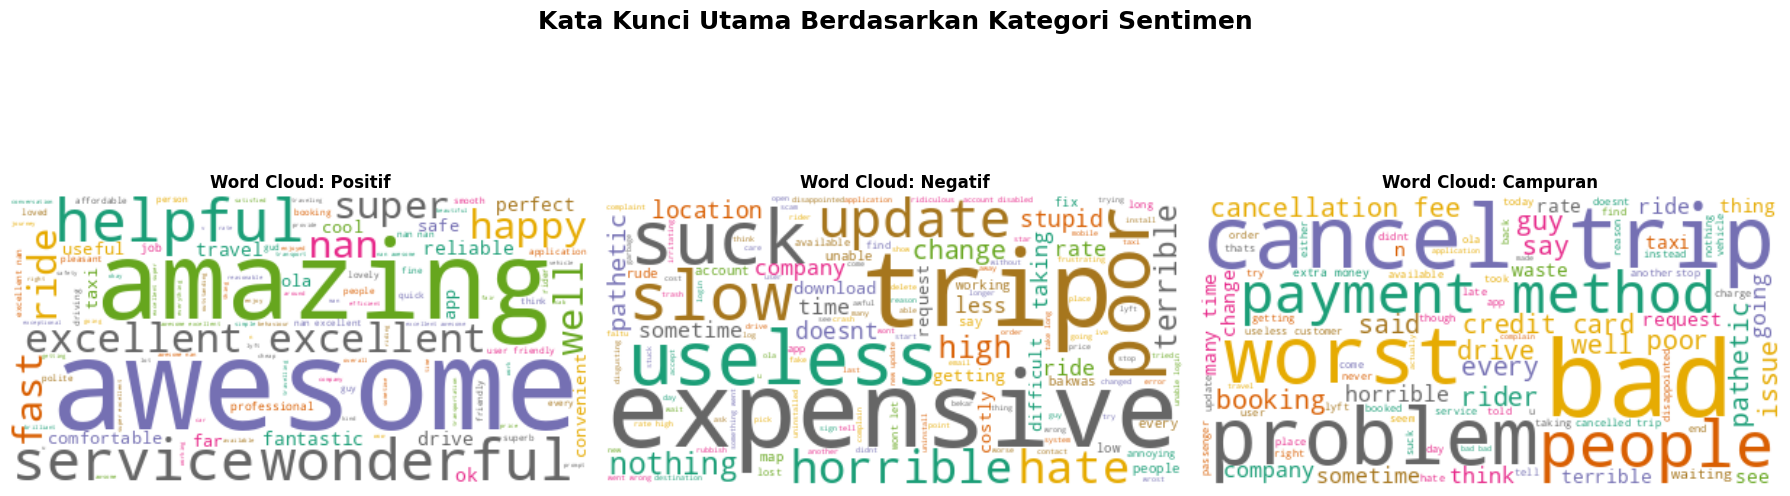

In [20]:

# Filter teks untuk setiap sentimen
pos_text = ' '.join(df_clean[df_clean['regex_sentiment'] == 'Positif']['content_final_clean'].astype(str))
neg_text = ' '.join(df_clean[df_clean['regex_sentiment'] == 'Negatif']['content_final_clean'].astype(str))
mix_text = ' '.join(df_clean[df_clean['regex_sentiment'] == 'Campuran']['content_final_clean'].astype(str))

def generate_wordcloud(text, title, ax):
    wordcloud = WordCloud(
        width=400, height=200, background_color='white', colormap='Dark2'
    ).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=12, weight='bold')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Word Cloud Positif
generate_wordcloud(pos_text, 'Word Cloud: Positif', axes[0])

# Word Cloud Negatif
generate_wordcloud(neg_text, 'Word Cloud: Negatif', axes[1])

# Word Cloud Campuran
generate_wordcloud(mix_text, 'Word Cloud: Campuran', axes[2])

plt.suptitle('Kata Kunci Utama Berdasarkan Kategori Sentimen', fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


--- Top 20 Kata Kunci Sentimen: Positif ---
            Word  Frequency
0      excellent      60199
1            nan      37996
2        awesome      30715
3       friendly      21206
4          super      18752
5           safe      16171
6           fast      15967
7             ok      15343
8        helpful      14368
9        amazing      12682
10        useful      11789
11      reliable      10670
12       service      10468
13    convenient      10450
14          well       9609
15  professional       9336
16         clean       8745
17   comfortable       8627
18         quick       8338
19     wonderful       7929


/tmp/ipython-input-4167985135.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')


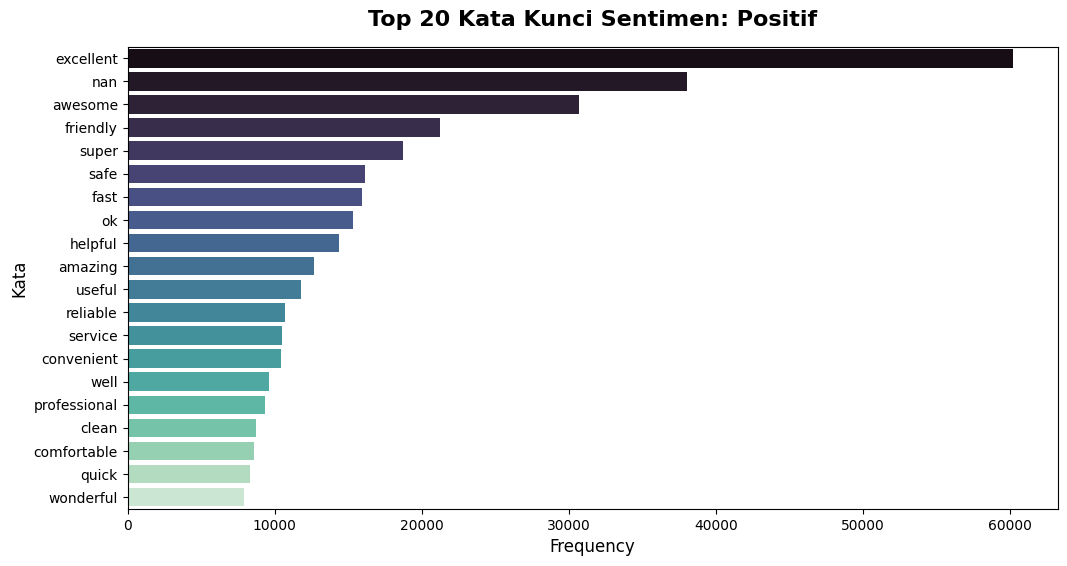


--- Top 20 Kata Kunci Sentimen: Negatif ---
         Word  Frequency
0        high       4320
1     account       4095
2   expensive       3823
3        trip       3746
4      unable       2949
5      update       2756
6        suck       2730
7        poor       2668
8    location       2649
9       wrong       2483
10       slow       2454
11       rate       2396
12     change       2362
13    useless       2328
14       long       2210
15        new       2010
16    nothing       1963
17       time       1933
18       hate       1845
19   password       1822


/tmp/ipython-input-4167985135.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')


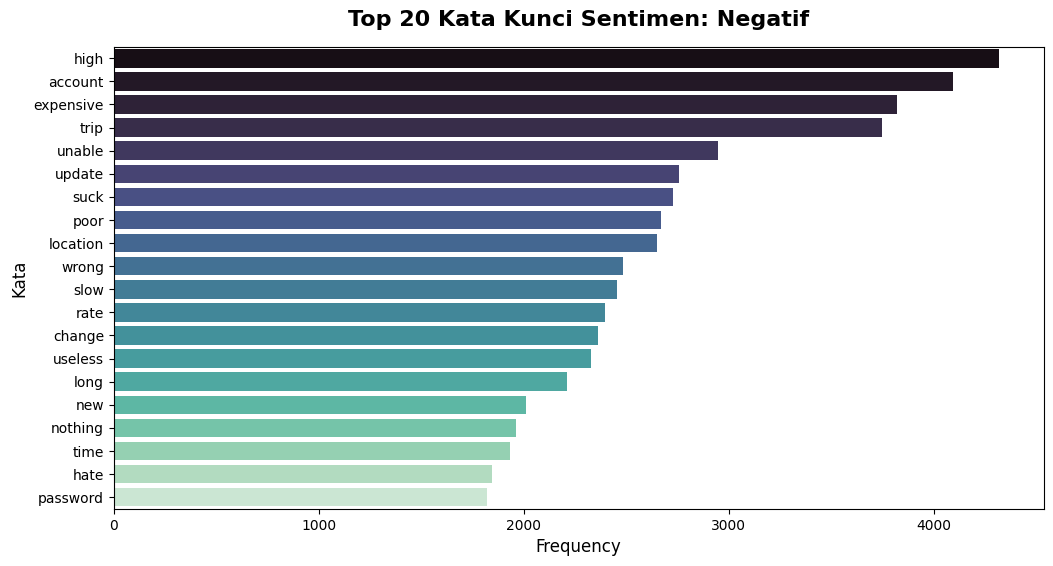


--- Top 20 Kata Kunci Sentimen: Campuran ---
         Word  Frequency
0        trip      72814
1      cancel      64186
2       worst      59698
3         bad      57442
4      charge      46825
5       money      42190
6         pay      41628
7       never      40604
8     payment      40527
9     charged      36245
10      issue      33572
11   location      32172
12       time      29866
13    account      29360
14    problem      26672
15       card      26414
16    booking      25320
17  cancelled      25082
18       ride      23677
19      didnt      21449


/tmp/ipython-input-4167985135.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')


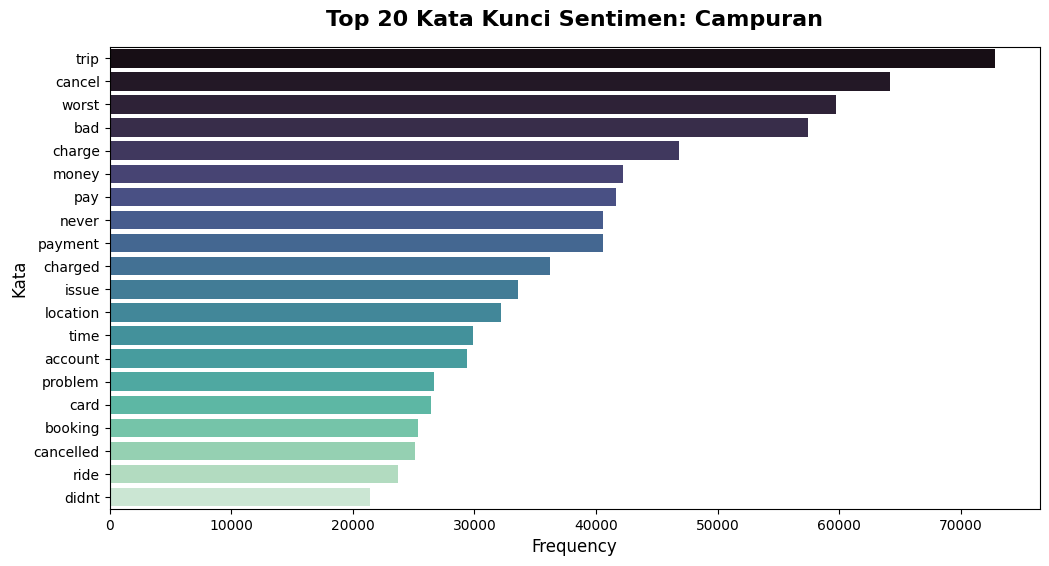

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
import pandas as pd

# Ambil N kata teratas untuk ditampilkan
TOP_N = 20

# --- Fungsi untuk Menghitung dan Memvisualisasikan Frekuensi ---
def analyze_sentiment_frequency(text, sentiment_name):
    """Menghitung, menampilkan DataFrame, dan memvisualisasikan Top N kata per sentimen."""

    # Split teks menjadi list kata
    words_list = text.split()

    # Hitung frekuensi
    fdist = FreqDist(words_list)

    # Ambil N kata teratas
    top_words = fdist.most_common(TOP_N)
    df_freq = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    print(f"\n--- Top {TOP_N} Kata Kunci Sentimen: {sentiment_name} ---")
    print(df_freq)

    # Visualisasi
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')
    plt.title(f'Top {TOP_N} Kata Kunci Sentimen: {sentiment_name}', fontsize=16, weight='bold', pad=15)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Kata', fontsize=12)
    plt.show()


# --- Menjalankan Analisis untuk Setiap Kategori ---

# 1. Sentimen Positif
analyze_sentiment_frequency(pos_text, 'Positif')

# 2. Sentimen Negatif
analyze_sentiment_frequency(neg_text, 'Negatif')

# 3. Sentimen Campuran
analyze_sentiment_frequency(mix_text, 'Campuran')